In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
denver_raw = pd.read_csv('../data/i-25-denver, colorado, usa-air-quality.csv')

In [3]:
denver_raw.head()

,date,pm25,pm10,o3,no2,so2,co
0,2020/4/2,22,4,10,4,,1
1,2020/4/3,16,13,15,6,,1
2,2020/4/4,35,10,15,5,,1
3,2020/4/5,24,8,17,6,,2
4,2020/4/6,20,,,,,


In [4]:
denver_raw.describe()

,date,pm25,pm10,o3,no2,so2,co
count,1790,1790,1790,1790,1790,1790,1790
unique,1790,94,68,31,27,4,17
top,2018/7/5,25,21,,10,,3
freq,1,61,88,1120,204,1740,591


In [5]:
denver_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 7 columns):
date     1790 non-null object
 pm25    1790 non-null object
 pm10    1790 non-null object
 o3      1790 non-null object
 no2     1790 non-null object
 so2     1790 non-null object
 co      1790 non-null object
dtypes: object(7)
memory usage: 98.0+ KB


In [6]:
denver_raw[' pm25']

0        22
1        16
2        35
3        24
4        20
       ... 
1785       
1786       
1787       
1788       
1789       
Name:  pm25, Length: 1790, dtype: object

In [7]:
denver_raw['date']= pd.to_datetime(denver_raw['date'])

In [8]:
type(denver_raw['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
denver_raw['date'].min()

Timestamp('2014-09-01 00:00:00')

In [10]:
denver_raw['date'].max()

Timestamp('2020-04-06 00:00:00')

In [11]:
denver_sorted = denver_raw.sort_values('date')

In [12]:
(denver_sorted[' pm25'].max())

' 99'

In [13]:
type(denver_sorted[' pm25'][0])

str

In [15]:
denver_sorted.head()

,date,pm25,pm10,o3,no2,so2,co
1781,2014-09-01,,15,,6,,2
1737,2014-09-02,31,26,,10,,4
1738,2014-09-03,35,27,,12,,4
1739,2014-09-04,31,39,,11,,3
1740,2014-09-05,40,,,8,,4


In [16]:
denver_nan = denver_sorted.replace(" ", np.NaN)

In [17]:
denver_nan.head(100)

,date,pm25,pm10,o3,no2,so2,co
1781,2014-09-01,NaN,15,NaN,6,NaN,2
1737,2014-09-02,31,26,NaN,10,NaN,4
1738,2014-09-03,35,27,NaN,12,NaN,4
1739,2014-09-04,31,39,NaN,11,NaN,3
1740,2014-09-05,40,NaN,NaN,8,NaN,4
...,...,...,...,...,...,...,...
1712,2014-12-05,73,38,NaN,17,NaN,6
1713,2014-12-06,45,42,NaN,16,NaN,10
1714,2014-12-07,63,22,NaN,15,NaN,7
1715,2014-12-08,36,59,NaN,21,NaN,12


In [18]:
denver_nan['pm25'] = pd.to_numeric(denver_nan[' pm25'])

In [19]:
denver_nan['pm10'] = pd.to_numeric(denver_nan[' pm10'])

In [20]:
denver_nan['o3'] = pd.to_numeric(denver_nan[' o3'])

In [21]:
denver_nan['no2'] = pd.to_numeric(denver_nan[' no2'])

In [22]:
denver_nan['so2'] = pd.to_numeric(denver_nan[' so2'])

In [23]:
denver_nan['co'] = pd.to_numeric(denver_nan[' co'])

In [24]:
denver_clean = denver_nan.drop(' pm25', axis = 1).drop(' pm10', axis = 1).drop(' o3', axis = 1).drop(' no2', axis = 1).drop(' so2', axis = 1).drop(' co', axis = 1)

In [25]:
denver_clean.head()

,date,pm25,pm10,o3,no2,so2,co
1781,2014-09-01,NaN,15.0,NaN,6.0,NaN,2.0
1737,2014-09-02,31.0,26.0,NaN,10.0,NaN,4.0
1738,2014-09-03,35.0,27.0,NaN,12.0,NaN,4.0
1739,2014-09-04,31.0,39.0,NaN,11.0,NaN,3.0
1740,2014-09-05,40.0,NaN,NaN,8.0,NaN,4.0


In [26]:
denver_clean.head(-5)

,date,pm25,pm10,o3,no2,so2,co
1781,2014-09-01,NaN,15.0,NaN,6.0,NaN,2.0
1737,2014-09-02,31.0,26.0,NaN,10.0,NaN,4.0
1738,2014-09-03,35.0,27.0,NaN,12.0,NaN,4.0
1739,2014-09-04,31.0,39.0,NaN,11.0,NaN,3.0
1740,2014-09-05,40.0,NaN,NaN,8.0,NaN,4.0
...,...,...,...,...,...,...,...
31,2020-03-28,34.0,11.0,18.0,4.0,NaN,1.0
32,2020-03-29,16.0,4.0,17.0,5.0,NaN,1.0
33,2020-03-30,11.0,16.0,16.0,8.0,NaN,2.0
34,2020-03-31,21.0,23.0,18.0,7.0,NaN,1.0


/Users/taylorbritt/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


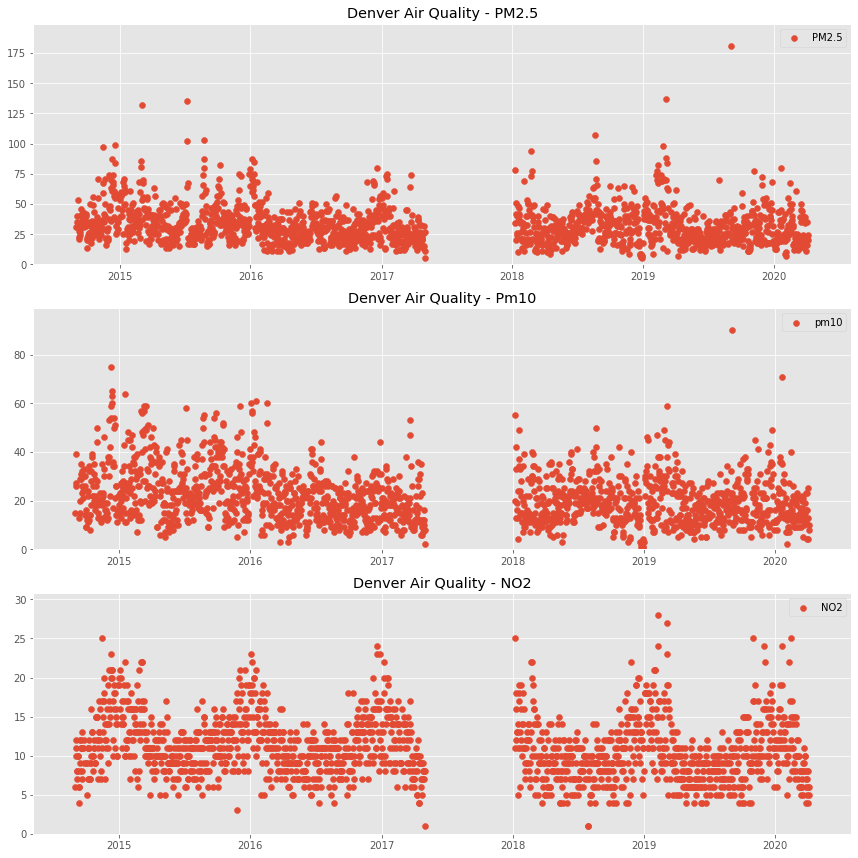

In [27]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(3,1,1)
ax.scatter(denver_clean['date'], denver_clean['pm25'], label = "PM2.5" )
ax.set_title('Denver Air Quality - PM2.5')
ax.set_ylim(0, (denver_clean['pm25'].max()*1.1))
ax.legend(loc='best')
fig.tight_layout(pad=1)
ax = fig.add_subplot(3,1,2)
ax.scatter(denver_clean['date'], denver_clean['pm10'], label = "pm10" )
ax.set_title('Denver Air Quality - Pm10')
ax.set_ylim(0, (denver_clean['pm10'].max()*1.1))
ax.legend(loc='best')
fig.tight_layout(pad=1)
ax = fig.add_subplot(3,1,3)
ax.scatter(denver_clean['date'], denver_clean['no2'], label = "NO2" )
ax.set_title('Denver Air Quality - NO2')
ax.set_ylim(0, (denver_clean['no2'].max()*1.1))
ax.legend(loc='best')
fig.tight_layout(pad=1)

In [28]:
denverq1_16 = denver_clean[denver_clean['date'] > datetime.datetime(2016, 1, 1)]

In [29]:
denverq1_16 = denverq1_16[denverq1_16['date'] < datetime.datetime(2016, 4, 1)]

In [30]:
denverq1_16.head(-1)

,date,pm25,pm10,o3,no2,so2,co
1778,2016-01-03,NaN,34.0,NaN,17.0,NaN,10.0
1376,2016-01-04,60.0,60.0,NaN,23.0,NaN,13.0
1196,2016-01-05,87.0,56.0,NaN,22.0,NaN,14.0
1197,2016-01-06,71.0,57.0,NaN,19.0,NaN,9.0
1198,2016-01-07,62.0,36.0,NaN,18.0,NaN,7.0
...,...,...,...,...,...,...,...
1277,2016-03-26,27.0,12.0,NaN,7.0,NaN,3.0
1278,2016-03-27,38.0,8.0,NaN,8.0,NaN,3.0
1279,2016-03-28,16.0,31.0,NaN,16.0,NaN,5.0
1280,2016-03-29,38.0,32.0,NaN,12.0,NaN,4.0


In [31]:
len(denverq1_16)

89

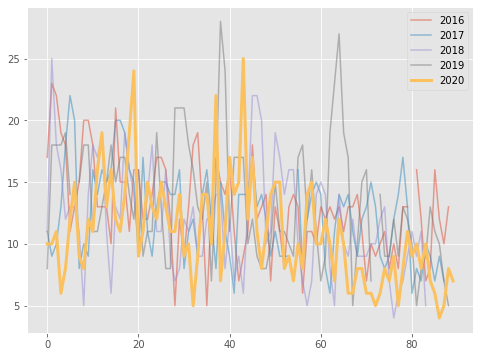

In [32]:
years = [2016, 2017, 2018, 2019, 2020]

fig, ax = plt.subplots(figsize=(8,6))
for year in years:
    denverq = denver_clean[denver_clean['date'] > datetime.datetime(year, 1, 1)]
    denverq = denverq[denverq['date'] < datetime.datetime(year, 4, 1)]
    x = np.arange(0, len(denverq), 1)
    y = denverq['no2']
    if year == 2020:
        ax.plot(x, y, linewidth = 3, label = str(year))
    else:
        ax.plot(x, y, alpha = .5, label = str(year))
    
ax.legend(loc='best')
    


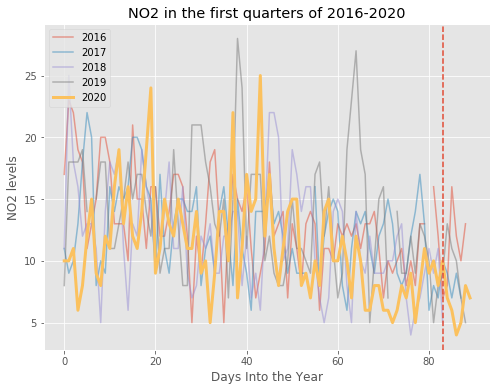

In [33]:
years = [2016, 2017, 2018, 2019, 2020]
cols = {'pm25': 'PM25', 'pm10': 'PM10', 'o3' : 'O3', 'no2':'NO2', 'so2':'SO2', 'co':'CO'}

fig, ax = plt.subplots(figsize=(8,6))
for year in years:
    denverq = denver_clean[denver_clean['date'] > datetime.datetime(year, 1, 1)]
    denverq = denverq[denverq['date'] < datetime.datetime(year, 4, 1)]
    x = np.arange(0, len(denverq), 1)
    y = denverq['no2']
    if year == 2020:
        ax.plot(x, y, linewidth = 3, label = str(year))
    else:
        ax.plot(x, y, alpha = .5, label = str(year))
ax.set_title('NO2 in the first quarters of 2016-2020')
ax.axvline(x = 83, ls='--')
ax.set_ylabel('NO2 levels')
ax.set_xlabel('Days Into the Year')
ax.legend(loc='upper left')


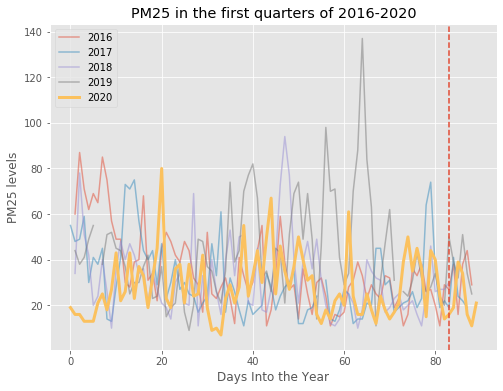

In [34]:
years = [2016, 2017, 2018, 2019, 2020]
cols = {'pm25': 'PM25', 'pm10': 'PM10', 'o3' : 'O3', 'no2':'NO2', 'so2':'SO2', 'co':'CO'}

fig, ax = plt.subplots(figsize=(8,6))
for year in years:
    denverq = denver_clean[denver_clean['date'] > datetime.datetime(year, 1, 1)]
    denverq = denverq[denverq['date'] < datetime.datetime(year, 4, 1)]
    x = np.arange(0, len(denverq), 1)
    y = denverq['pm25']
    if year == 2020:
        ax.plot(x, y, linewidth = 3, label = str(year))
    else:
        ax.plot(x, y, alpha = .5, label = str(year))
ax.set_title('PM25 in the first quarters of 2016-2020')
ax.axvline(x = 83, ls='--')
ax.set_ylabel('PM25 levels')
ax.set_xlabel('Days Into the Year')
ax.legend(loc='best')

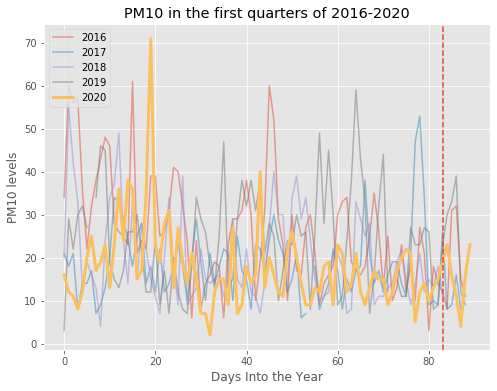

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
for year in years:
    denverq = denver_clean[denver_clean['date'] > datetime.datetime(year, 1, 1)]
    denverq = denverq[denverq['date'] < datetime.datetime(year, 4, 1)]
    x = np.arange(0, len(denverq), 1)
    y = denverq['pm10']
    if year == 2020:
        ax.plot(x, y, linewidth = 3, label = str(year))
    else:
        ax.plot(x, y, alpha = .5, label = str(year))
ax.set_title('PM10 in the first quarters of 2016-2020')
ax.set_ylabel('PM10 levels')
ax.set_xlabel('Days Into the Year')
ax.axvline(x = 83, ls='--')
ax.legend(loc='upper left')

In [36]:
col = np.arange(0,91).reshape(-1,1)

In [37]:
row = np.arange(0, 10)

In [38]:
mat = col + row

In [39]:
mat

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
       [14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
       [17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
       [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
       [19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
       [20, 21, 22, 

In [40]:
np.mean(denverq1_16['no2'].iloc[1:9])

17.625

In [41]:
denverq1_16_long = denver_clean[denver_clean['date'] > datetime.datetime(year-1, 12, 27)]
denverq1_16_long = denverq1_16_long[denverq1_16_long['date'] < datetime.datetime(year, 4, 6)]

In [42]:
windows = []

for i in range(0, len(denverq1_16_long) -10):
    index = range(mat[i][0], mat[i][9])
    windows.append(np.nanmean(denverq1_16_long['no2'].iloc[index]))

In [43]:
len(windows)

89

In [44]:
len(denverq1_16)

89

len(windows)

In [45]:
def moving_day_average(df, col_name, day_range = 9):
    col = np.arange(0,len(df)).reshape(-1,1)
    row = np.arange(0, day_range+1)
    windows = []
    for i in range(0, len(df) -10):
        index = range(mat[i][0], mat[i][day_range])
        windows.append(np.nanmean(df[col_name].iloc[index]))
    return windows
    
    

In [46]:
moving_day_average(denverq1_16_long, 'no2')

[9.25,
 10.0,
 10.5,
 10.333333333333334,
 9.88888888888889,
 10.11111111111111,
 10.222222222222221,
 10.777777777777779,
 12.222222222222221,
 12.777777777777779,
 13.222222222222221,
 12.88888888888889,
 13.11111111111111,
 13.777777777777779,
 14.555555555555555,
 16.0,
 15.222222222222221,
 14.333333333333334,
 14.555555555555555,
 14.222222222222221,
 14.222222222222221,
 14.666666666666666,
 14.555555555555555,
 13.666666666666666,
 12.222222222222221,
 12.777777777777779,
 12.555555555555555,
 12.0,
 11.11111111111111,
 10.777777777777779,
 10.666666666666666,
 10.777777777777779,
 10.666666666666666,
 11.88888888888889,
 11.11111111111111,
 11.333333333333334,
 12.11111111111111,
 13.11111111111111,
 13.777777777777779,
 15.0,
 14.777777777777779,
 15.555555555555555,
 14.333333333333334,
 14.444444444444445,
 14.444444444444445,
 14.11111111111111,
 14.222222222222221,
 14.222222222222221,
 12.333333333333334,
 12.0,
 10.88888888888889,
 10.777777777777779,
 10.77777777777777

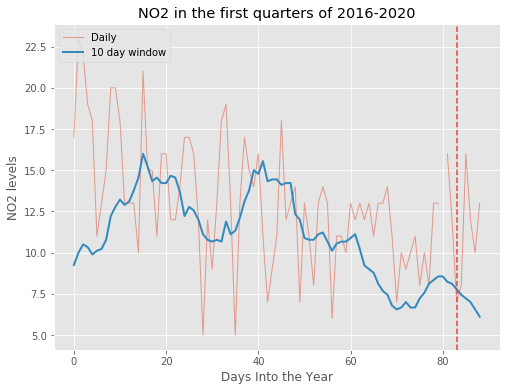

In [47]:
x = np.arange(0, len(denverq1_16), 1)
#     y = denverq['pm10']


fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, denverq1_16['no2'], linewidth = 1, alpha = .5, label = 'Daily')
ax.plot(x, moving_day_average(denverq1_16_long, 'no2'), linewidth = 2, alpha = 1, label = "10 day window")
ax.set_title('NO2 in the first quarters of 2016-2020')
ax.set_ylabel('NO2 levels')
ax.set_xlabel('Days Into the Year')
ax.axvline(x = 83, ls='--')
ax.legend(loc='upper left')

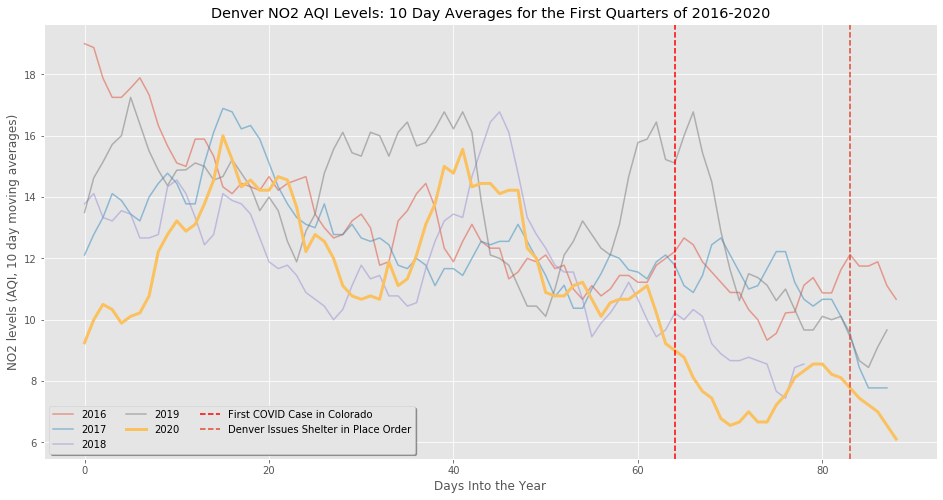

In [48]:
fig, ax = plt.subplots(figsize=(16,8))
for year in years:
    denverq = denver_clean[denver_clean['date'] > datetime.datetime(year-1, 12, 27)]
    denverq = denverq[denverq['date'] < datetime.datetime(year, 4, 6)]
    x = np.arange(0, len(denverq)-10, 1)
    y = moving_day_average(denverq, 'no2')
    if year == 2020:
        ax.plot(x, y, linewidth = 3, label = str(year))
    else:
        ax.plot(x, y, alpha = .5, label = str(year))
ax.set_title('Denver NO2 AQI Levels: 10 Day Averages for the First Quarters of 2016-2020')
ax.axvline(x = 64, ls='--', c='red', label = "First COVID Case in Colorado")

ax.axvline(x = 83, ls='--', label = "Denver Issues Shelter in Place Order")
ax.set_ylabel('NO2 levels (AQI, 10 day moving averages)')
ax.set_xlabel('Days Into the Year')
ax.legend(loc='best', ncol=3, fancybox=True, shadow=True)

In [51]:
denver_clean['no2'].unique()

array([ 6., 10., 12., 11.,  8.,  7.,  4.,  9., 13., nan,  5., 16., 15.,
       17., 25., 18., 20., 14., 19., 21., 23., 22.,  3., 24.,  1., 28.,
       27.])

In [52]:
file_picklename_dict = {
'aurora-hills visitor center, northern virginia, usa-air-quality.csv' : 'dc',
'beacon-hill, seattle, washington, usa-air-quality.csv' : 'seattle',
'beijing-air-quality.csv' : 'beijing',
'clinton,-houston, texas-air-quality.csv' : 'houston',
'dallas-hinton, fort worth, dallas, texas-air-quality.csv' : 'dallas',
'gary-iitri,-indiana, usa-air-quality.csv' : 'gary',
'i-25-denver, colorado, usa-air-quality.csv' : 'chicago',
'los-angeles-north main street-air-quality.csv' : 'la',
'madrid-air-quality.csv' : 'madrid',
'milano-pascal città studi, lombardia, italy-air-quality.csv' : 'milan',
'oakland-- west, alameda, california-air-quality.csv' : 'oakland',
'paris-air-quality.csv' : 'paris',
'parque-d.pedro ii, são paulo, brazil-air-quality.csv' : 'saopaulo',
'parque-o\'higgins, chile-air-quality.csv' : 'santiago',
'queens-college, new york, usa-air-quality.csv' : 'nyc',
'wuhan-air-quality (1).csv' : 'wuhan'}  

In [57]:
file_picklename_dict.keys()

dict_keys(['aurora-hills visitor center, northern virginia, usa-air-quality.csv', 'beacon-hill, seattle, washington, usa-air-quality.csv', 'beijing-air-quality.csv', 'clinton,-houston, texas-air-quality.csv', 'dallas-hinton, fort worth, dallas, texas-air-quality.csv', 'gary-iitri,-indiana, usa-air-quality.csv', 'i-25-denver, colorado, usa-air-quality.csv', 'los-angeles-north main street-air-quality.csv', 'madrid-air-quality.csv', 'milano-pascal città studi, lombardia, italy-air-quality.csv', 'oakland-- west, alameda, california-air-quality.csv', 'paris-air-quality.csv', 'parque-d.pedro ii, são paulo, brazil-air-quality.csv', "parque-o'higgins, chile-air-quality.csv", 'queens-college, new york, usa-air-quality.csv', 'wuhan-air-quality (1).csv'])

In [62]:
for filename in file_picklename_dict.keys():
    print(f'The filename is "{filename}" and the picklefile is called "{file_picklename_dict[filename]}"')

The filename is "aurora-hills visitor center, northern virginia, usa-air-quality.csv" and the picklefile is called "dc"
The filename is "beacon-hill, seattle, washington, usa-air-quality.csv" and the picklefile is called "seattle"
The filename is "beijing-air-quality.csv" and the picklefile is called "beijing"
The filename is "clinton,-houston, texas-air-quality.csv" and the picklefile is called "houston"
The filename is "dallas-hinton, fort worth, dallas, texas-air-quality.csv" and the picklefile is called "dallas"
The filename is "gary-iitri,-indiana, usa-air-quality.csv" and the picklefile is called "gary"
The filename is "i-25-denver, colorado, usa-air-quality.csv" and the picklefile is called "chicago"
The filename is "los-angeles-north main street-air-quality.csv" and the picklefile is called "la"
The filename is "madrid-air-quality.csv" and the picklefile is called "madrid"
The filename is "milano-pascal città studi, lombardia, italy-air-quality.csv" and the picklefile is called